In [1]:
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto, InteractiveSession
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

### Apply Data Augmentation

In [2]:
train_dir = "data/train/"
test_dir = "data/val/"
target_size = (64,64)
batch_size = 32
classification_type = "binary"

train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_data = train_datagen.flow_from_directory(train_dir,
                                                 target_size=target_size,
                                                  batch_size=batch_size,
                                                 class_mode=classification_type)

testing_data = test_datagen.flow_from_directory(test_dir,
                                                 target_size=target_size,
                                                batch_size=batch_size,
                                                 class_mode=classification_type)

Found 694 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


### Build the newtork

In [7]:
input_shape = target_size + (3,)

model = Sequential()

model.add(Conv2D(32, 3, padding='same', activation='relu',strides=2,input_shape=input_shape))
model.add(MaxPool2D(pool_size=2, strides=2,))

model.add(Conv2D(64, 3, padding='same', activation='relu',strides=2))
model.add(MaxPool2D(pool_size=2, strides=2,))

model.add(Conv2D(128, 3, padding='same', activation='relu',strides=2))
model.add(MaxPool2D(pool_size=2, strides=2,))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear', kernel_regularizer=l2(0.01)))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)              

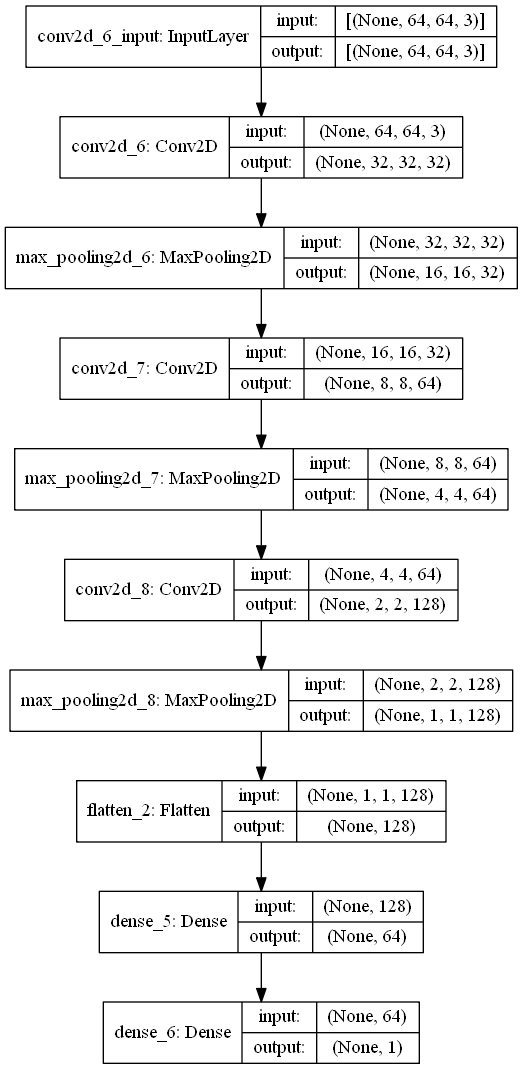

In [15]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [8]:
### Compile and Fit the network

model.compile(optimizer='adam', loss='hinge', metrics=['accuracy'])
history = model.fit(training_data, validation_data=testing_data, epochs=15)

Epoch 1/15
22/22 [==============================] - 2s 72ms/step - loss: 1.0142 - accuracy: 0.5173 - val_loss: 0.9521 - val_accuracy: 0.5250
Epoch 2/15
22/22 [==============================] - 1s 67ms/step - loss: 0.8921 - accuracy: 0.5793 - val_loss: 0.8374 - val_accuracy: 0.6200
Epoch 3/15
22/22 [==============================] - 1s 66ms/step - loss: 0.7787 - accuracy: 0.6571 - val_loss: 0.7817 - val_accuracy: 0.6350
Epoch 4/15
22/22 [==============================] - 1s 66ms/step - loss: 0.7528 - accuracy: 0.6614 - val_loss: 0.8011 - val_accuracy: 0.6300
Epoch 5/15
22/22 [==============================] - 1s 67ms/step - loss: 0.7129 - accuracy: 0.6888 - val_loss: 0.7401 - val_accuracy: 0.6750
Epoch 6/15
22/22 [==============================] - 1s 67ms/step - loss: 0.6526 - accuracy: 0.7147 - val_loss: 0.8028 - val_accuracy: 0.6400ss: 0.6746 - accu - ETA: 0s - loss: 0.6481 - accura
Epoch 7/15
22/22 [==============================] - 1s 66ms/step - loss: 0.6352 - accuracy: 0.7176 - va

### Plot Training History

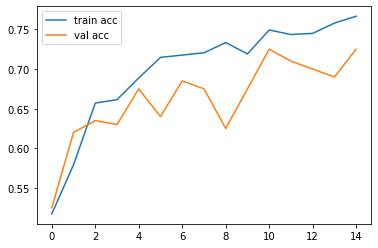

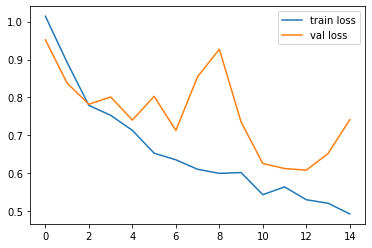

In [20]:
# plotting the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('acc_plot.png')
plt.show()


# plotting the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('loss_plot.png')
plt.show()



In [10]:
### save the model
model.save('model.h5')

# PREDICTION

In [11]:
from tensorflow.keras.models import load_model
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import cv2

In [26]:
prediction_model = load_model("model.h5")

def predict_image(image_path):
    image = tf.keras.preprocessing.image.load_img(image_path, target_size = (64,64))
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])  # Convert single image to a batch.
    predictions = prediction_model.predict(input_arr)

    if predictions[0]>0:
        print("Predator")
    else:
        print("Alien")
        
predict_image("predator_2.jpg")

Predator
